___
<a href='https://honglab.ai'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="50%" height="50%"/></p></a>
___
<center><em>Content Copyright by HongLab, Inc.</em></center>

#### 참고 자료
- [Andrej Karpathy 유튜브](https://www.youtube.com/andrejkarpathy)
- [Build a Large Language Model (From Scratch)](https://www.manning.com/books/build-a-large-language-model-from-scratch)
- [Om-Alve/smolGPT 깃헙](https://github.com/Om-Alve/smolGPT)
- 트랜스포머 논문 - [Attention Is All You Need](https://arxiv.org/abs/1706.03762)
- OpenAI GPT2 논문 - [Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)



#### 안내사항

LLM의 핵심 개념을 개인 PC에서도 간단하게 실습하면서 공부할 수 있는 학습 자료입니다. 널리 알려진 교육/학술 자료들을 참고하여 쉽게 공부할 수 있도록 요약하고 정리한 것입니다. 코딩 스타일이나 활용 범위에 대해 오해 없으시길 바랍니다.

#### 전체 과정 요약

LLM을 만들 때는 

1. 사전훈련(pretraining)으로 일반적인 언어 능력을 가르친 후에 
2. 미세조정(fine tuning) 단계에서 특정 업무에 적응

시키는 것이 기본입니다. 여기에 

3. 데이터베이스(+인터넷) 검색 기능을 추가

하면 지식의 범위와 정확성을 높일 수 있습니다. 사람이 생각을 거듭하여 더 깊이있는 결론을 이끌어 내듯이 LLM도 

4. 내부적으로 질의를 반복하여 더 좋은 결론을 도출

하도록 만들 수 있습니다.

LLM 기반 AI 에이전트를 만들때는 핵심이 되는 LLM이 필요한데요, 위의 과정들을 모두 직접 수행해서 LLM을 바닥부터 만드는 경우 보다는 공개되어 있는 LLM 모델들을 가져다가 나의 용도에 맞도록 다듬어서 사용하는 것이 일반적입니다. 다만, 최근에는 LLM을 바닥부터 만드는 기술에 대한 진입장벽이 낮아지고 있어서 회사별로 필요한 LLM을 바닥부터 각자 만들어 사용하게 될 가능성도 높아지고 있습니다.

여기서는 LLM의 기본 원리를 이해하기 위해서 사전훈련 과정을 바닥부터 진행해보겠습니다. 훈련 과정의 큰 틀은 일반적인 머신러닝 절차를 따릅니다.

1. 훈련 데이터 준비
1. 데이터 로더 정의
1. 모델 정의
1. 훈련
1. 결과 확인

#### 훈련 데이터 준비

준비한 텍스트 파일을 읽어 들여서 정리한 후에 앞에 cleaned_가 붙은 파일 이름으로 정리합니다.
> 예시) alice.txt &rarr; cleaned_alice.txt

- 캐글 해리포터 책 - [Harry Potter Books](https://www.kaggle.com/datasets/shubhammaindola/harry-potter-books?select=02+Harry+Potter+and+the+Chamber+of+Secrets.txt)
- 캐글 앨리스 책 - [alice.txt](https://www.kaggle.com/datasets/leelatte/alicetxt)
- 훈련 데이터는 제가 배포하지 않습니다. 직접 다운받거나 준비하셔야합니다.

In [1]:
import re

def clean_text(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        book_text = file.read()

    cleaned_text = re.sub(r'\n+', ' ', book_text) # 줄바꿈을 빈칸으로 변경
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text) # 여러 빈칸을 하나의 빈칸으로

    print("cleaned_" + filename, len(cleaned_text), "characters") # 글자 수 출력

    with open("cleaned_" + filename, 'w', encoding='utf-8') as file:
        file.write(cleaned_text)

filenames_list = ["alice.txt", "01 Harry Potter and the Sorcerers Stone.txt"]
# filenames_list = ["묵향 1-36권 [전동조].txt"]

for filename in filenames_list:
    clean_text(filename)

cleaned_alice.txt 143225 characters
cleaned_01 Harry Potter and the Sorcerers Stone.txt 436000 characters


#### 토큰화

UTF-8 BPE(Bype Pair Encoding)

In [2]:
# import tiktoken # pip install tiktoken

# tokenizer = tiktoken.get_encoding("gpt2")

# text = "대사께서는 도(道)를 얻은 모양이구려."

# tokens = tokenizer.encode(text)

# print(len(text), len(tokens))
# print(tokens)

# print(tokenizer.decode(tokens))

In [20]:
from transformers import AutoTokenizer # pip install transformers

tokenizer = AutoTokenizer.from_pretrained("LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct")  # KoGPT2 사용
# tokenizer = AutoTokenizer.from_pretrained("skt/kogpt2-base-v2")  # KoGPT2 사용

print("Vocab size :", len(tokenizer))

text = "대사께서는 도(道)를 얻은 모양이구려."

tokens = tokenizer.encode(text)

print(len(text), len(tokens))
print(tokens)

# print(tokenizer.decode(tokens))


Vocab size : 102400
21 15
[31980, 1599, 712, 657, 769, 369, 26733, 370, 4605, 4573, 732, 5844, 634, 30556, 375]


In [21]:
for char in text:
    token_ids = tokenizer.encode(char)     # 한 글자씩 인코딩(토큰화)
    decoded = tokenizer.decode(token_ids)  # 한 글자씩 디코딩
    print(f"'{char}' -> {token_ids} -> '{decoded}'")

'대' -> [816] -> '대'
'사' -> [765] -> '사'
'께' -> [1599] -> '께'
'서' -> [712] -> '서'
'는' -> [657] -> '는'
' ' -> [582] -> ' '
'도' -> [720] -> '도'
'(' -> [369] -> '('
'道' -> [26733] -> '道'
')' -> [370] -> ')'
'를' -> [4605] -> '를'
' ' -> [582] -> ' '
'얻' -> [75666] -> '얻'
'은' -> [732] -> '은'
' ' -> [582] -> ' '
'모' -> [1679] -> '모'
'양' -> [1509] -> '양'
'이' -> [634] -> '이'
'구' -> [887] -> '구'
'려' -> [1061] -> '려'
'.' -> [375] -> '.'


#### 데이터로더(DataLoader)

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, txt, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # token_ids = tokenizer.encode("<|endoftext|>" + txt, allowed_special={"<|endoftext|>"})
        token_ids = tokenizer.encode(txt)

        print("# of tokens in txt:", len(token_ids))

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

# with open("cleaned_묵향 1-36권 [전동조].txt", 'r', encoding='utf-8-sig') as file: # 선택: -sig를 붙여서 BOM 제거
with open("cleaned_alice.txt", 'r', encoding='utf-8-sig') as file: # 선택: -sig를 붙여서 BOM 제거
    txt = file.read()

dataset = MyDataset(txt, max_length = 32, stride = 16)

train_loader = DataLoader(dataset, batch_size=8, shuffle=True, drop_last=True)

# of tokens in txt: 70259


In [6]:
dataiter = iter(train_loader)

x, y = next(dataiter)

print(tokenizer.decode(x[0].tolist()))
print(tokenizer.decode(y[0].tolist()))


t be angry about it. And yet I wish I could show you our c
be angry about it. And yet I wish I could show you our cat


#### 뉴럴네트워크 모델 정의

In [22]:
import torch.nn as nn

#VOCAB_SIZE = 50257  # Tiktoken
VOCAB_SIZE = len(tokenizer) # AutoTokenizer
CONTEXT_LENGTH = 128  # Shortened context length (orig: 1024)
EMB_DIM = 768  # Embedding dimension
NUM_HEADS = 12  # Number of attention heads
NUM_LAYERS = 12  # Number of layers
DROP_RATE = 0.1  # Dropout rate
QKV_BIAS = False  # Query-key-value bias

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        
        assert d_out % NUM_HEADS == 0, "d_out must be divisible by n_heads"

        self.d_out = d_out
        self.head_dim = d_out // NUM_HEADS  # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=QKV_BIAS)
        self.W_key = nn.Linear(d_in, d_out, bias=QKV_BIAS)
        self.W_value = nn.Linear(d_in, d_out, bias=QKV_BIAS)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(DROP_RATE)
        self.register_buffer('mask', torch.triu(torch.ones(CONTEXT_LENGTH, CONTEXT_LENGTH), diagonal=1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)  # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `NUM_HEADS` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, NUM_HEADS, head_dim)
        keys = keys.view(b, num_tokens, NUM_HEADS, self.head_dim)
        values = values.view(b, num_tokens, NUM_HEADS, self.head_dim)
        queries = queries.view(b, num_tokens, NUM_HEADS, self.head_dim)

        # Transpose: (b, num_tokens, NUM_HEADS, head_dim) -> (b, NUM_HEADS, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, NUM_HEADS, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = NUM_HEADS * self.head_dim
        context_vec = context_vec.reshape(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)  # optional projection

        return context_vec

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

class FeedForward(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(EMB_DIM, 4 * EMB_DIM),
            GELU(),
            nn.Linear(4 * EMB_DIM, EMB_DIM),
        )

    def forward(self, x):
        return self.layers(x)

class TransformerBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=EMB_DIM,
            d_out=EMB_DIM)
    
        self.ff = FeedForward()
        self.norm1 = LayerNorm(EMB_DIM)
        self.norm2 = LayerNorm(EMB_DIM)
        self.drop_shortcut = nn.Dropout(DROP_RATE)

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)   # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed-forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x


class GPTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.tok_emb = nn.Embedding(VOCAB_SIZE, EMB_DIM)
        self.pos_emb = nn.Embedding(CONTEXT_LENGTH, EMB_DIM)
        self.drop_emb = nn.Dropout(DROP_RATE)

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock() for _ in range(NUM_LAYERS)])

        self.final_norm = LayerNorm(EMB_DIM)
        self.out_head = nn.Linear(EMB_DIM, VOCAB_SIZE, bias=False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

#### 훈련

In [23]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = "cpu"
torch.manual_seed(123)
model = GPTModel()
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)


In [9]:
tokens_seen, global_step = 0, -1

losses = []

for epoch in range(4):
    model.train()  # Set model to training mode
    
    epoch_loss = 0
    for input_batch, target_batch in train_loader:
        optimizer.zero_grad() # Reset loss gradients from previous batch iteration
        input_batch, target_batch = input_batch.to(device), target_batch.to(device)

        logits = model(input_batch)
        loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
        epoch_loss += loss.item()
        loss.backward() # Calculate loss gradients
        optimizer.step() # Update model weights using loss gradients
        tokens_seen += input_batch.numel()
        global_step += 1

        if global_step % 1000 == 0:
            print(f"Tokens seen: {tokens_seen}")
        # Optional evaluation step

    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch: {epoch}, Loss: {avg_loss}")
    torch.save(model.state_dict(), "model_" + str(epoch).zfill(3) + ".pth")

Tokens seen: 256
Epoch: 0, Loss: 3.692345430816177
Tokens seen: 256256
Epoch: 1, Loss: 2.7695518331806155
Epoch: 2, Loss: 2.398261228399555
Tokens seen: 512256
Epoch: 3, Loss: 2.095241442649034


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


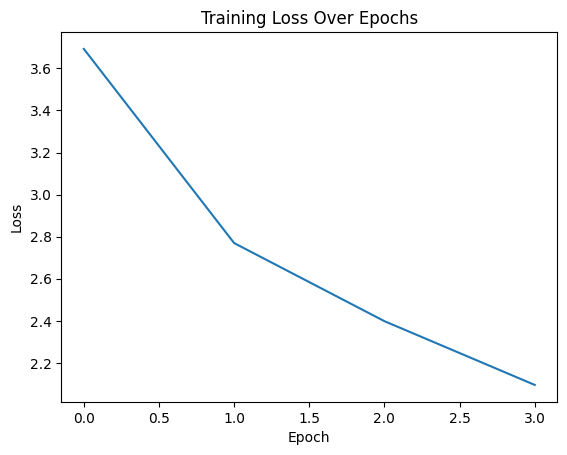

In [10]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

#### 결과 확인

In [48]:
model.load_state_dict(torch.load("model_009.pth", map_location=device, weights_only=True))
model.eval()

idx = tokenizer.encode("고대의 무술은") # 토큰 id의 list, [84094, 730, 70327, 732]
idx = torch.tensor(idx).unsqueeze(0)  # torch.Tensor, [1, 4] = [배치수, 토큰수]

with torch.no_grad():
    logits = model(idx) # torch.Tensor [1, 4, 102400]

logits = logits[:, -1, :] # torch.Size([1, 102400]), 주어진 문장 다음 추측

idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # 가장 확률이 높은 한 토큰씩 선택, torch.Size([1, 1]) tensor([[10364]])

flat = idx_next.squeeze(0) # 배치 차원 제거 torch.Size([1])
out = tokenizer.decode(flat.tolist()) # 텐서를 리스트로 바꿔서 디코드

print(out)

 대단


In [49]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        if top_k is not None:
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        if temperature > 0.0:
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:
            break

        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [50]:
model.load_state_dict(torch.load("model_009.pth", map_location=device, weights_only=True))
model.eval()

start_context = input("Start context: ")

# idx = tokenizer.encode(start_context, allowed_special={'<|endoftext|>'})
idx = tokenizer.encode(start_context)
idx = torch.tensor(idx).unsqueeze(0)

context_size = model.pos_emb.weight.shape[0] 

for i in range(10):

    token_ids = generate(
        model=model,
        idx=idx.to(device),
        max_new_tokens=50,
        context_size= context_size,
        top_k=50,
        temperature=0.5
    )

    flat = token_ids.squeeze(0) # remove batch dimension
    out = tokenizer.decode(flat.tolist()).replace("\n", " ")

    print(i, ":", out)

0 : 헬로우전이 벌어졌다. 콰쾅! 드디어 폭발적인 기세로 날아갔다. 그것을 아무리 뒤져도 적기사를 가공할 만한 위력은 없었다. 거의 90퍼센트 이상 완성되어 있었던 청기사의
1 : 헬로우전이다. 번쩍! "크윽!" 그의 손은 앞에 있던 사람의 목을 향해 있었다. 진팔이 입을 헤벌리고 달려오던 수하들이 공포에 주춤주춤 뒤로 물러서기 시작한 것
2 : 헬로우전이다. "크으으하하하, 드디어!" 다크의 손이 앞으로 쏘아져 나갔다. 그리고 마물의 머리 위에는 호비트들을 향해 아르티어스는 다급히 손을 내저었다. 그의
3 : 헬로우전이다. 이런 검이 검이 부서져 나가며 그사이 영혼이 자리를 물려주고 있던 서류를 남겨 두고 말이다. 물론 그 전에는 코란 근위 기사단을 제외한다면 남작에게 남작이라는 작
4 : 헬로우전이다." 아르티어스의 주문에 따라 마나를 주입한 상태로 회전하며 날아가던 파이어해머의 발걸음은 순식간에 멈췄다. 그는 언제나처럼 마법사가 아니라면 누구라도 불가능하다는 듯 자신을 떨쳐
5 : 헬로우전으로 아쿠아 룰러를 봉인한 후, 이 세상에 단 한 번만 더 검을 들어 보고, 그 검을 주인이 잘리고 있는 자리에 앉아서 꿀꺽....... 하지만 이때 여기 있던 묵향이 무슨 일인가 해서
6 : 헬로우전이다. 이런 검이 드래곤에게서 마법은 걸지도 않았는데도 불구하고, 곧장 알카사스의 변방이 비약적으로 진행되었다. 여기서 거기서 할 수도 있는 일이 있을 테니까.
7 : 헬로우전이다. 허공에서 날아오는 불덩어리에 코린트의 기사단을 기습한다면 정말 대단한 타격을 줄 수 있을 겁니다." "아무렴, 내 전에 수고했다." 바빠서은 표정으로 다크는 뒤에 서 있
8 : 헬로우전이다!" 그와 동시에 그녀의 손에서 발사된 큼직한 불덩어리가 휙 날아가서는 동굴 속으로 들어갔다. 그녀는 마법사였기에 드래곤이라고 부르기가 민망해졌을 정도로 엄청난 파워를 지니
9 : 헬로우전이라고 하셨습니까?" "그렇소이다." "여진는 내 명령에 따라 하종이 되었소. 내는 교주님께 갈 예정이오. 3일 후에 혹시

In [13]:
TODO: 결과 확인 (모델 로딩)
TODO: 특정 단어의 확률 확인 (Dobby is free)

SyntaxError: invalid syntax (1702333287.py, line 1)